# Problem Set 1

### 0. Initialise

In [75]:
# Initialise
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import warnings
import ipywidgets as widgets
from ipywidgets import interactive
warnings.filterwarnings("ignore")

### 1. Problem

**a.** Write down the mean-squared error function and its gradient with respect to the parameters.
![Maths Image](math.jpeg)

**b.** Implement the loss function loss(X,y,theta) and gradient function gradient(X,y,theta) in Python.


In [76]:
def loss(X, y, theta):
    """
    Compute the loss function.
    
    Parameters
    ----------
    X : numpy array
        The feature matrix.
    y : numpy array
        The target vector.
    theta : numpy array
    
    Returns
    -------
    float
        The loss value.
    """
    n  = len(y)
    loss = (1 / n) * (X @ theta - y).T @ (X @ theta - y)
    return loss


# 1.b.2
def gradient(X, y, theta):
    """
    Compute the gradient of the loss function.
    
    Parameters
    ----------
    X : numpy array
        The feature matrix.
    y : numpy array
        The target vector.
    theta : numpy array
    
    Returns
    -------
    numpy array
        The gradient vector.
    """
    n = len(y)
    gradient = (2 / n) * X.T @ (X @ theta -y)
    return gradient

### 2. Problem

**a.** Implement the simple gradient descent algorithm.

In [77]:
def gradient_descent(X, y, theta_init, alpha, max_steps, precision):
    """
    Parameters
    ----------
    X : numpy array
        The feature matrix.
    y : numpy array
        The target vector.
    theta_init : numpy array
        The initial value of the parameter vector.
    alpha : float
        The learning rate.
    max_steps : int
        The maximum number of steps.
    precision : float
        The precision value.
    """
    history_theta = theta_init # Column vector
    history_loss = [loss(X, y, theta_init)]
    theta = theta_init

    for i in range(max_steps):
        grad = gradient(X, y, theta)
        old_theta = theta
        theta = theta - alpha * grad
        history_theta = np.column_stack((history_theta, theta))
        history_loss.append(loss(X, y, theta))

        if np.linalg.norm(theta - old_theta) < precision:
            break
    
    return history_theta, history_loss

def plot_loss(history_loss, title='Loss (MSE)'):
    """
    Plot the loss function.
    
    Parameters
    ----------
    history_loss : list
        The list of loss values.
    """
    plt.plot(history_loss)
    plt.xlabel('Iteration')
    plt.ylabel(title)
    plt.savefig(f'{title}.png')

Theta from custom gradient descent:
[1.56799799 0.54944193]


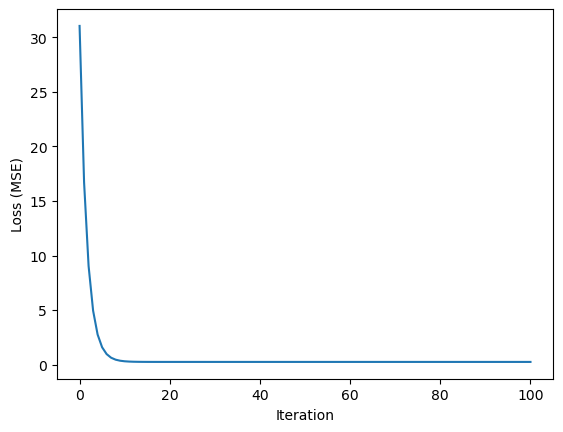

In [78]:
# Initialise a two dimensional feature matrix X with a 1-vector-column and 100 random values.
X = np.column_stack((np.ones(100), np.random.rand(100) + 3))

y = X[:, 1] + np.random.normal(0, 0.5, 100)
theta = np.array([2, 2])

# 2.a.
history_theta, history_loss = gradient_descent(X, y, theta, 0.01, 100, 1e-6)
print("Theta from custom gradient descent:")
print(history_theta[:, -1])
# Select the last column of history_theta

# Plot the loss function
plot_loss(history_loss)


**b.** Compare the resulting estimates with those generated by scipy.stats, statsmodels, or sklearn. Plot the best-fitting line along with a scatterplot of the data.


Theta from SGDRegressor (without intercept):
[[0.2378454 ]
 [0.94789056]]

    Insight: The resulting coefficients can be quite different,
    especially when one chooses a bad initial theta.
    


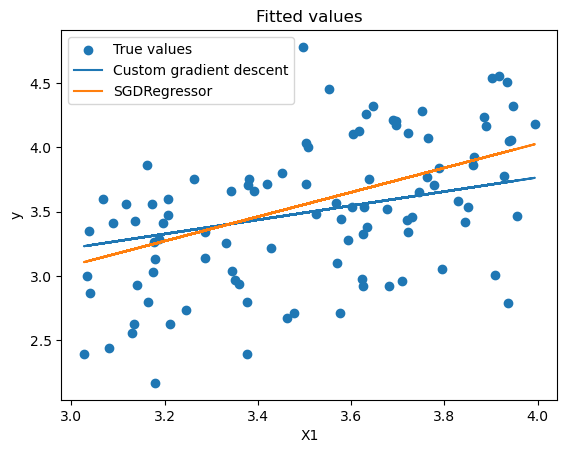

In [79]:
def get_fitted_values(X, theta):
    y_fitted = X @ theta
    return y_fitted


def plot_fitted_values(X, y, y_fitted):
    plt.scatter(X[:, 1], y, label='True values')
    for name, values in y_fitted.items():
        plt.plot(X[:, 1], values, label=name)
    plt.xlabel('X1')
    plt.ylabel('y')
    plt.title('Fitted values')
    plt.legend()
    plt.savefig('fitted_values.png')

# Compare with sklearn's gradient descent
sgd = SGDRegressor(alpha=0.01, max_iter=1000, tol=1e-6, learning_rate="constant", eta0=0.01, fit_intercept=False)
sgd.fit(X, y.ravel())  # Convert y to 1D

# Get theta (only coefficients, no intercept)
theta_sgd = sgd.coef_.reshape(-1, 1)  # Now theta only contains slope

print("Theta from SGDRegressor (without intercept):")
print(theta_sgd)

print("""
    Insight: The resulting coefficients can be quite different,
    especially when one chooses a bad initial theta.
    """)

# Plot the resulting OLS
fitted_values = {"Custom gradient descent": get_fitted_values(X, history_theta[:, -1]), 
                "SGDRegressor": get_fitted_values(X, theta_sgd)}

plot_fitted_values(X, y, fitted_values)

### 3. Problem
Visualize the loss surface, using the provided helper functions.

*Note: I will not use these functions, given that they are a bit unreadable from the pdf.*

In [81]:

def plot_loss_surface(history_loss, history_theta, grid_max=3, grid_min=0):
    # Generate theta values from (0,0) to (10,10) with step 0.1
    theta0_vals = np.arange(0, grid_max + 0.1, grid_min + 0.1)
    theta1_vals = np.arange(0, grid_max + 0.1, grid_min + 0.1)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)  # Meshgrid for theta0, theta1

    # Compute loss for each (theta0, theta1) pair
    Z = np.zeros(T0.shape)
    # Compute the loss for each (theta0, theta1) pair
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            theta = np.array([T0[i, j], T1[i, j]])  # Correct shape: 1D vector
            Z[i, j] = loss(X, y, theta)  # Compute loss for this theta pair


    # Add the history_loss as a third dimension
    # Convert list to NumPy array
    history_loss = np.array(history_loss)

    # Stack along the first axis
    theta_path = np.vstack((history_theta, history_loss.reshape(1, -1)))
    theta0_path, theta1_path, loss_path = theta_path

    # Plot 3D Loss Surface
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T0, T1, Z, cmap='viridis', alpha=0.7)  # Loss surface
    ax.plot(theta0_path, theta1_path, loss_path, color='r', linewidth=2, label="Gradient Descent Path")

    # Labels and View Angle
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel('Loss')
    ax.set_title("3D Loss Surface with Gradient Descent Path")
    ax.view_init(30, 120)  # Adjust angle for better view
    ax.legend()

    plt.show()

X = np.column_stack((np.ones(100), np.random.rand(100) + 3))

y = X[:, 1] + np.random.normal(0, 0.5, 100)
theta = np.array([2, 2])
learning_rate = 0.01

# 2.a.

def interactive_plot(learning_rate):
    history_theta, history_loss = gradient_descent(X, y, theta, learning_rate, 1000, 1e-6)    
    plot_loss_surface(history_loss, history_theta)

interactive_plot = interactive(
    interactive_plot,
    learning_rate=widgets.FloatSlider(min=0.01, max=0.1, step=0.01, value=0.01),
)

# Display the interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.01, description='learning_rate', max=0.1, min=0.01, step=0.01), Outp…